#### Uber is a taxi service provider as we know, we need to predict the highbooking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report   
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
df1 = pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q5\rideshare_kaggle.csv')

In [3]:
df1.shape

(693071, 57)

In [4]:
df=df1

In [5]:
df.drop(df[df.cab_type == 'Lyft'].index, inplace=True)

In [6]:
df.shape

(385663, 57)

In [7]:
df.head()

id     timestamp  hour  day  month  \
12  009e9c53-074d-43cf-aef2-0fbc7a47ed3d  1.543616e+09    22   30     11   
13  23f145da-f0c1-4d1f-a184-496bc003a7db  1.544698e+09    10   13     12   
14  357559cb-8c58-4278-a41a-e33b2e0997a3  1.544729e+09    19   13     12   
15  50ef1165-9d23-416c-a65c-18906207b295  1.545005e+09    23   16     12   
16  91c4861c-1780-42b0-bca1-bbd64a422cc3  1.544748e+09     0   14     12   

               datetime          timezone     source destination cab_type  \
12  2018-11-30 22:13:01  America/New_York  North End    West End     Uber   
13  2018-12-13 10:50:11  America/New_York  North End    West End     Uber   
14  2018-12-13 19:15:03  America/New_York  North End    West End     Uber   
15  2018-12-16 23:55:11  America/New_York  North End    West End     Uber   
16  2018-12-14 00:40:07  America/New_York  North End    West End     Uber   

    ... precipIntensityMax uvIndexTime  temperatureMin  temperatureMinTime  \
12  ...             0.0003  1543593600           28.79          1543579200   
13  ...             0.0001  1544716800           18.29          1544688000   
14  ...             0.0001  1544716800           18.29          1544688000   
15  ...             0.1252  1544979600           39.22          1544954400   
16  ...             0.0001  1544716800           18.29          1544688000   

    temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
12           42.52          1543600800                   26.41   
13           33.83          1544731200                   13.79   
14           33.83          1544731200                   13.79   
15           43.83          1544990400                   33.98   
16           33.83          1544731200                   13.79   

    apparentTemperatureMinTime  apparentTemperatureMax  \
12                  1543575600                   40.53   
13                  1544688000                   32.85   
14                  1544688000                   32.85   
15                  1545019200                   38.38   
16                  1544688000                   32.85   

   apparentTemperatureMaxTime  
12                 1543611600  
13                 1544734800  
14                 1544734800  
15                 1544986800  
16                 1544734800  

[5 rows x 57 columns]

In [8]:
df.tail(5)

id     timestamp  hour  day  month  \
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone    source destination cab_type  \
693066  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693067  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693068  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693069  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693070  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   

        ... precipIntensityMax uvIndexTime  temperatureMin  \
693066  ...                0.0  1543683600           31.42   
693067  ...                0.0  1543683600           31.42   
693068  ...                0.0  1543683600           31.42   
693069  ...                0.0  1543683600           31.42   
693070  ...                0.0  1543683600           31.42   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
693066          1543658400           44.76          1543690800   
693067          1543658400           44.76          1543690800   
693068          1543658400           44.76          1543690800   
693069          1543658400           44.76          1543690800   
693070          1543658400           44.76          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
693066                   27.77                  1543658400   
693067                   27.77                  1543658400   
693068                   27.77                  1543658400   
693069                   27.77                  1543658400   
693070                   27.77                  1543658400   

        apparentTemperatureMax apparentTemperatureMaxTime  
693066                   44.09                 1543690800  
693067                   44.09                 1543690800  
693068                   44.09                 1543690800  
693069                   44.09                 1543690800  
693070                   44.09                 1543690800  

[5 rows x 57 columns]

In [8]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385663 entries, 12 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           385663 non-null  object 
 1   timestamp                    385663 non-null  float64
 2   hour                         385663 non-null  int64  
 3   day                          385663 non-null  int64  
 4   month                        385663 non-null  int64  
 5   datetime                     385663 non-null  object 
 6   timezone                     385663 non-null  object 
 7   source                       385663 non-null  object 
 8   destination                  385663 non-null  object 
 9   cab_type                     385663 non-null  object 
 10  product_id                   385663 non-null  object 
 11  name                         385663 non-null  object 
 12  price                        330568 non-null  float64
 13

In [10]:
#checking missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

#### As we are intersetd in Uber taxi services dropping rows having other taxi services

In [12]:
df.describe().T

count          mean            std  \
timestamp                    385663.0  1.544046e+09  689620.901567   
hour                         385663.0  1.161134e+01       6.942097   
day                          385663.0  1.781101e+01       9.974964   
month                        385663.0  1.158634e+01       0.492489   
price                        330568.0  1.579534e+01       8.560300   
distance                     385663.0  2.191386e+00       1.178973   
surge_multiplier             385663.0  1.000000e+00       0.000000   
latitude                     385663.0  4.233801e+01       0.048001   
longitude                    385663.0 -7.106612e+01       0.020319   
temperature                  385663.0  3.957483e+01       6.722616   
apparentTemperature          385663.0  3.586248e+01       7.918864   
precipIntensity              385663.0  8.967966e-03       0.026971   
precipProbability            385663.0  1.468821e-01       0.329585   
humidity                     385663.0  7.414251e-01       0.138684   
windSpeed                    385663.0  6.194737e+00       3.150747   
windGust                     385663.0  8.481715e+00       5.294760   
windGustTime                 385663.0  1.544049e+09  693160.653180   
visibility                   385663.0  8.463261e+00       2.605283   
temperatureHigh              385663.0  4.502510e+01       5.994772   
temperatureHighTime          385663.0  1.544050e+09  694252.753608   
temperatureLow               385663.0  3.412980e+01       6.397018   
temperatureLowTime           385663.0  1.544103e+09  692789.189234   
apparentTemperatureHigh      385663.0  4.159079e+01       7.666184   
apparentTemperatureHighTime  385663.0  1.544051e+09  694629.726246   
apparentTemperatureLow       385663.0  3.011384e+01       8.075634   
apparentTemperatureLowTime   385663.0  1.544099e+09  693229.793388   
dewPoint                     385663.0  3.165727e+01       9.150155   
pressure                     385663.0  1.010089e+03      13.455788   
windBearing                  385663.0  2.199465e+02      99.211265   
cloudCover                   385663.0  6.868671e-01       0.358463   
uvIndex                      385663.0  2.485849e-01       0.473363   
visibility.1                 385663.0  8.463261e+00       2.605283   
ozone                        385663.0  3.135233e+02      27.954602   
sunriseTime                  385663.0  1.544028e+09  691600.785627   
sunsetTime                   385663.0  1.544061e+09  691124.630462   
moonPhase                    385663.0  5.787399e-01       0.244681   
precipIntensityMax           385663.0  3.736252e-02       0.055201   
uvIndexTime                  385663.0  1.544045e+09  691662.947286   
temperatureMin               385663.0  3.345056e+01       6.471418   
temperatureMinTime           385663.0  1.544042e+09  690666.547734   
temperatureMax               385663.0  4.524696e+01       5.641402   
temperatureMaxTime           385663.0  1.544048e+09  690587.089085   
apparentTemperatureMin       385663.0  2.971697e+01       7.117767   
apparentTemperatureMinTime   385663.0  1.544049e+09  687584.627249   
apparentTemperatureMax       385663.0  4.197666e+01       6.933250   
apparentTemperatureMaxTime   385663.0  1.544049e+09  691522.088913   

                                      min           25%           50%  \
timestamp                    1.543204e+09  1.543444e+09  1.543737e+09   
hour                         0.000000e+00  6.000000e+00  1.200000e+01   
day                          1.000000e+00  1.300000e+01  1.700000e+01   
month                        1.100000e+01  1.100000e+01  1.200000e+01   
price                        4.500000e+00  9.000000e+00  1.250000e+01   
distance                     2.000000e-02  1.300000e+00  2.170000e+00   
surge_multiplier             1.000000e+00  1.000000e+00  1.000000e+00   
latitude                     4.221480e+01  4.235030e+01  4.235190e+01   
longitude                   -7.110540e+01 -7.108100e+01 -7.106310e+01   
temperature

In [11]:
#Creating new column 'year','time' and dropping datetime
year = df['datetime'].apply(lambda y: y.split('-')[0])

In [12]:
df.insert(6, 'year',year)

In [13]:
time = df['datetime'].apply(lambda t:t.split(' ')[1])

In [14]:
df.insert(6, 'time',time)

In [15]:
#dropping first two and datetime column
df.drop(columns = ['id','timestamp','datetime'],axis=1,inplace=True)

In [16]:
#changing datatype of year
df['year'] = df['year'].astype(int)

In [17]:
#dropping year column
df.drop(['year'],axis=1,inplace=True)

In [18]:
df.describe().T

count          mean            std  \
hour                         385663.0  1.161134e+01       6.942097   
day                          385663.0  1.781101e+01       9.974964   
month                        385663.0  1.158634e+01       0.492489   
price                        330568.0  1.579534e+01       8.560300   
distance                     385663.0  2.191386e+00       1.178973   
surge_multiplier             385663.0  1.000000e+00       0.000000   
latitude                     385663.0  4.233801e+01       0.048001   
longitude                    385663.0 -7.106612e+01       0.020319   
temperature                  385663.0  3.957483e+01       6.722616   
apparentTemperature          385663.0  3.586248e+01       7.918864   
precipIntensity              385663.0  8.967966e-03       0.026971   
precipProbability            385663.0  1.468821e-01       0.329585   
humidity                     385663.0  7.414251e-01       0.138684   
windSpeed                    385663.0  6.194737e+00       3.150747   
windGust                     385663.0  8.481715e+00       5.294760   
windGustTime                 385663.0  1.544049e+09  693160.653180   
visibility                   385663.0  8.463261e+00       2.605283   
temperatureHigh              385663.0  4.502510e+01       5.994772   
temperatureHighTime          385663.0  1.544050e+09  694252.753608   
temperatureLow               385663.0  3.412980e+01       6.397018   
temperatureLowTime           385663.0  1.544103e+09  692789.189234   
apparentTemperatureHigh      385663.0  4.159079e+01       7.666184   
apparentTemperatureHighTime  385663.0  1.544051e+09  694629.726246   
apparentTemperatureLow       385663.0  3.011384e+01       8.075634   
apparentTemperatureLowTime   385663.0  1.544099e+09  693229.793388   
dewPoint                     385663.0  3.165727e+01       9.150155   
pressure                     385663.0  1.010089e+03      13.455788   
windBearing                  385663.0  2.199465e+02      99.211265   
cloudCover                   385663.0  6.868671e-01       0.358463   
uvIndex                      385663.0  2.485849e-01       0.473363   
visibility.1                 385663.0  8.463261e+00       2.605283   
ozone                        385663.0  3.135233e+02      27.954602   
sunriseTime                  385663.0  1.544028e+09  691600.785627   
sunsetTime                   385663.0  1.544061e+09  691124.630462   
moonPhase                    385663.0  5.787399e-01       0.244681   
precipIntensityMax           385663.0  3.736252e-02       0.055201   
uvIndexTime                  385663.0  1.544045e+09  691662.947286   
temperatureMin               385663.0  3.345056e+01       6.471418   
temperatureMinTime           385663.0  1.544042e+09  690666.547734   
temperatureMax               385663.0  4.524696e+01       5.641402   
temperatureMaxTime           385663.0  1.544048e+09  690587.089085   
apparentTemperatureMin       385663.0  2.971697e+01       7.117767   
apparentTemperatureMinTime   385663.0  1.544049e+09  687584.627249   
apparentTemperatureMax       385663.0  4.197666e+01       6.933250   
apparentTemperatureMaxTime   385663.0  1.544049e+09  691522.088913   

                                      min           25%           50%  \
hour                         0.000000e+00  6.000000e+00  1.200000e+01   
day                          1.000000e+00  1.300000e+01  1.700000e+01   
month                        1.100000e+01  1.100000e+01  1.200000e+01   
price                        4.500000e+00  9.000000e+00  1.250000e+01   
distance                     2.000000e-02  1.300000e+00  2.170000e+00   
surge_multiplier             1.000000e+00  1.000000e+00  1.000000e+00   
latitude                     4.221480e+01  4.235030e+01  4.235190e+01   
longitude                   -7.110540e+01 -7.108100e+01 -7.106310e+01   
temperature                  1.891000e+01  3.650000e+01  4.049000e+01   
apparentTemperature          1.213000e+01  3.191000e+01  3.592000e+01   
precipIn

C:\Users\pc\AppData\Local\Temp\ipykernel_11312\2035404333.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

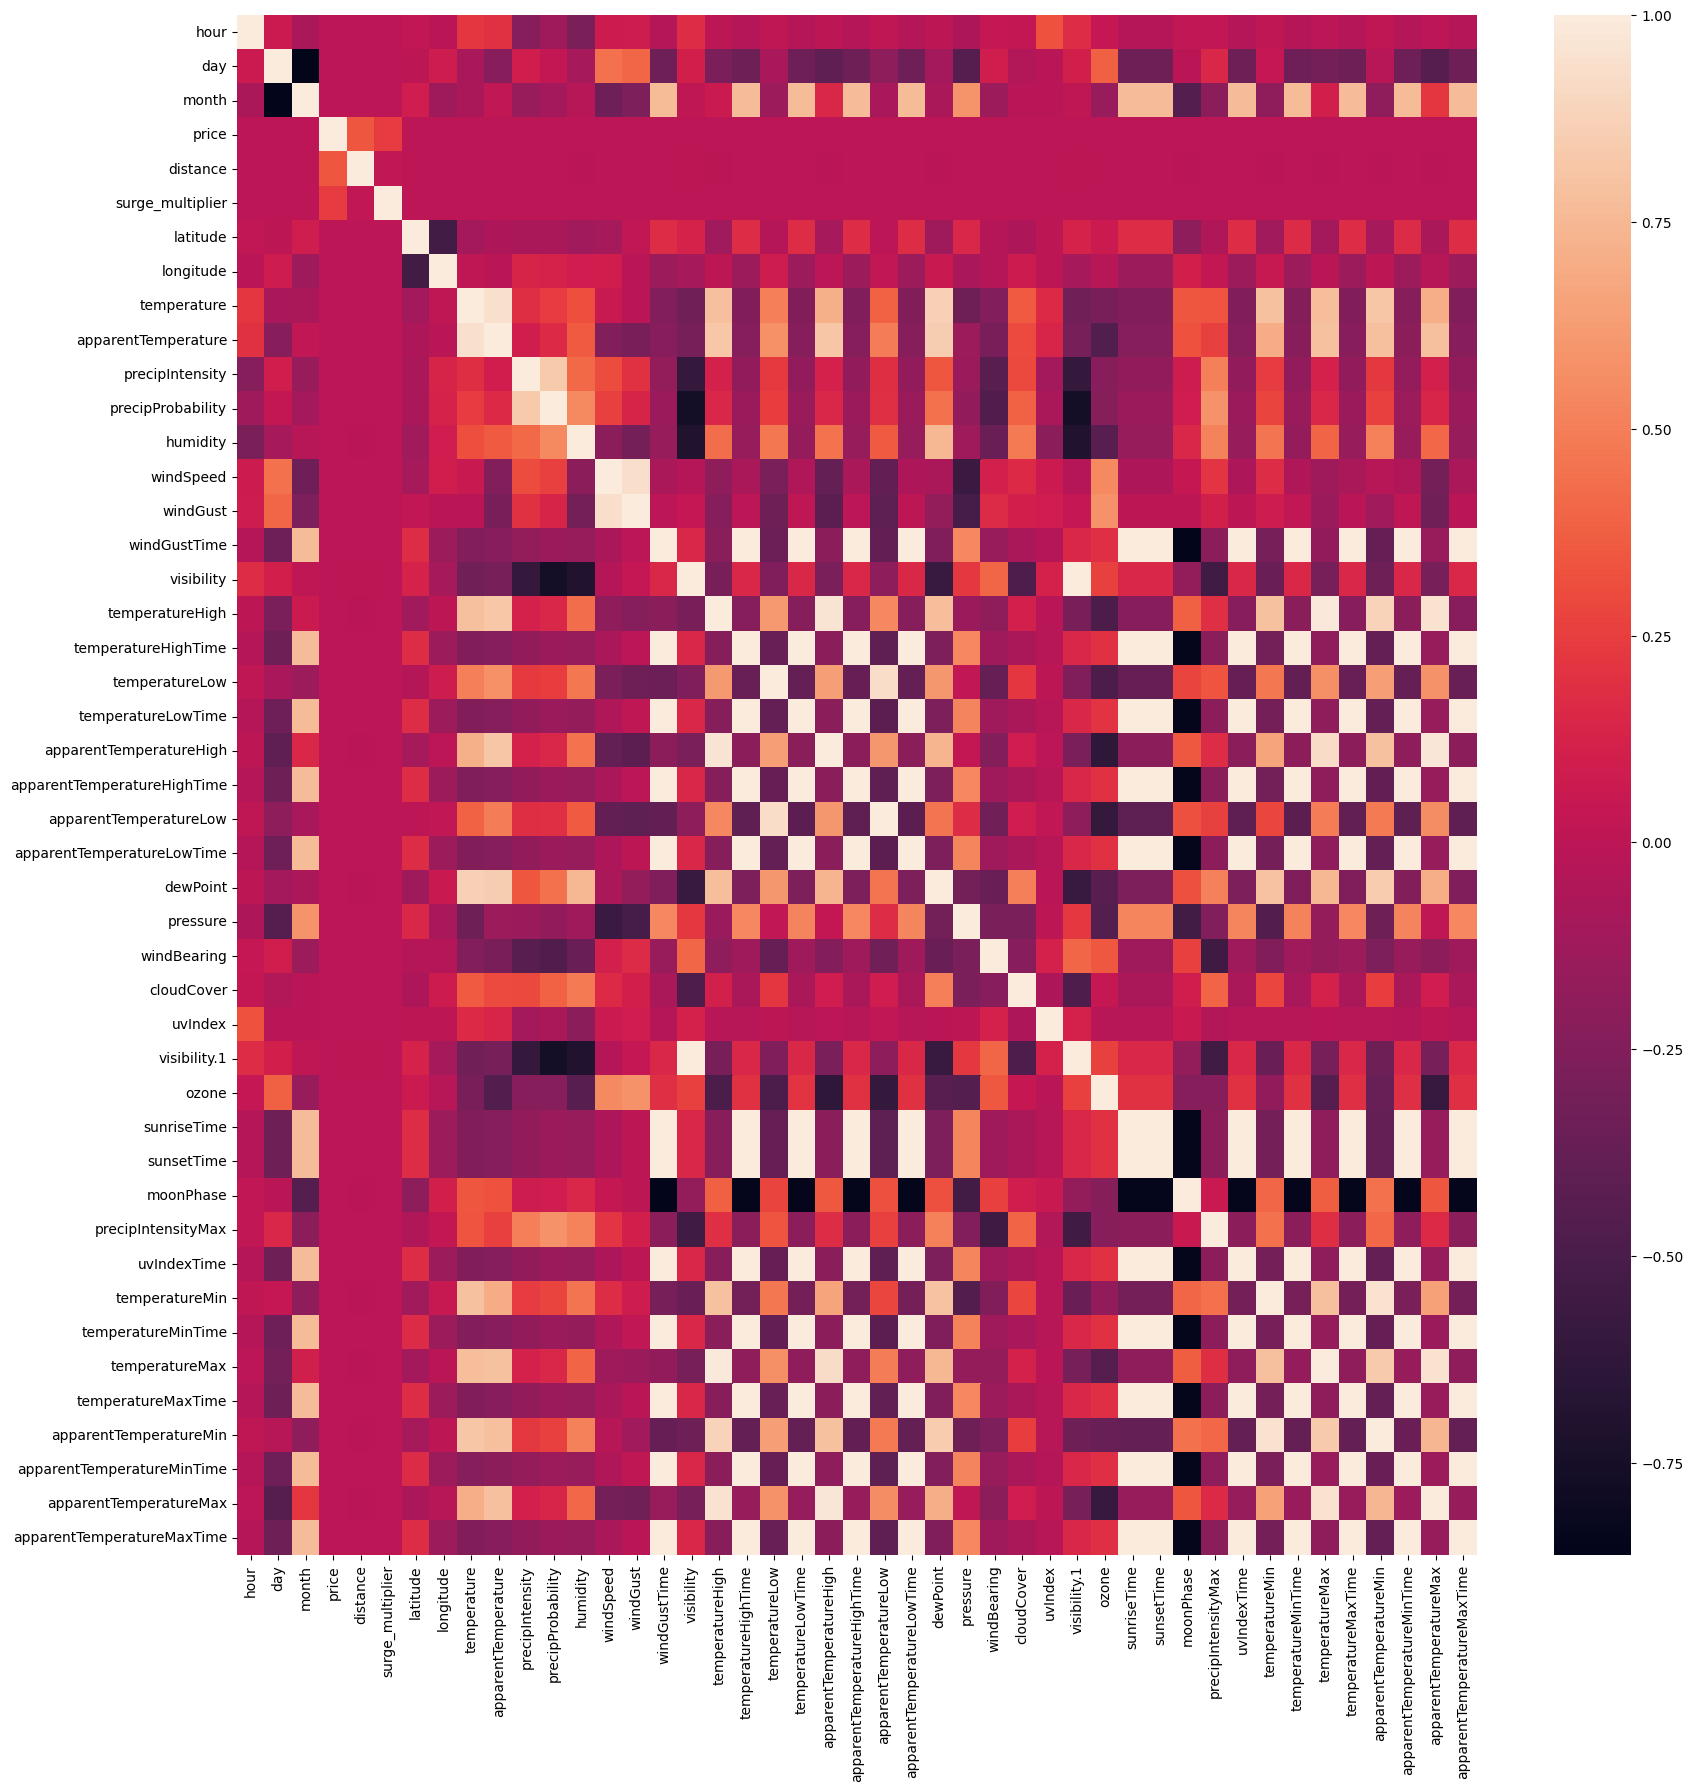

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [19]:
#checking temp related features correlation with price
temp_fea = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','temperatureMax','apparentTemperatureMax']]

<AxesSubplot:>

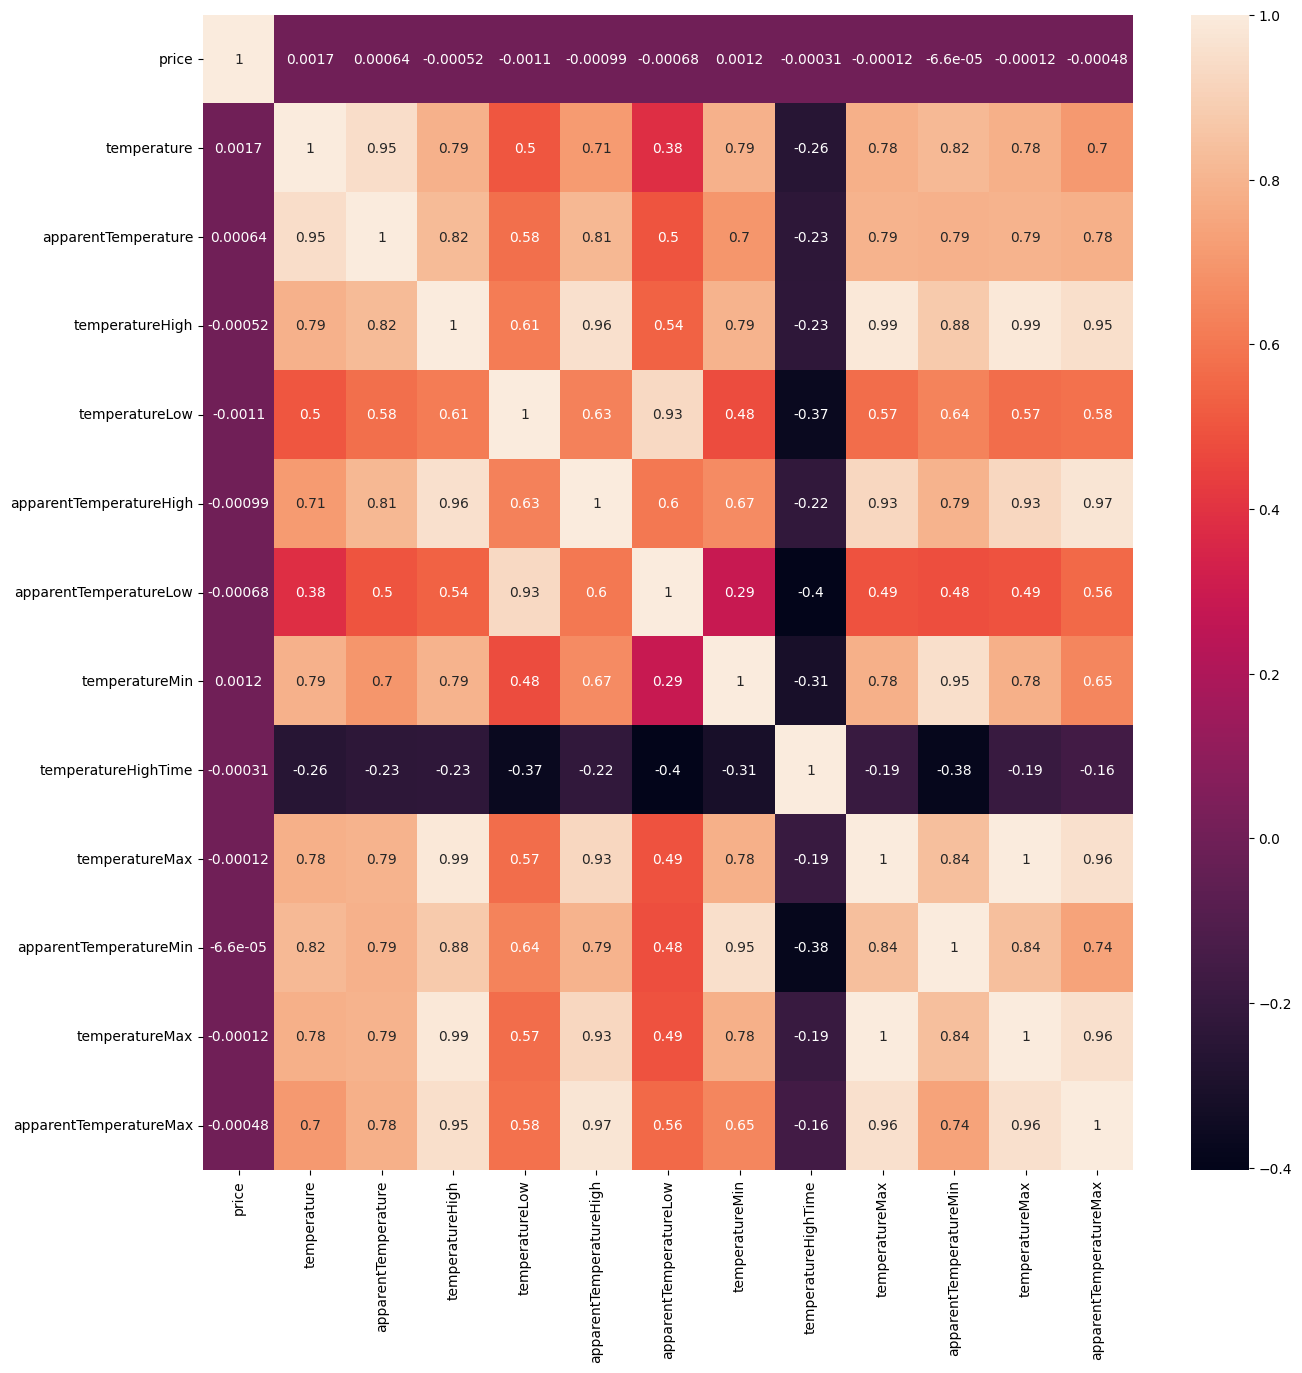

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(temp_fea.corr(),annot=True)

In [21]:
df.drop(temp_fea.columns[1:],axis=1,inplace=True)

In [22]:
#checking climate related features correlation with price feature
climate_fea = df[['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed','windGust', 'visibility', 
           'dewPoint', 'pressure', 'windBearing','cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase','precipIntensity']]

<AxesSubplot:>

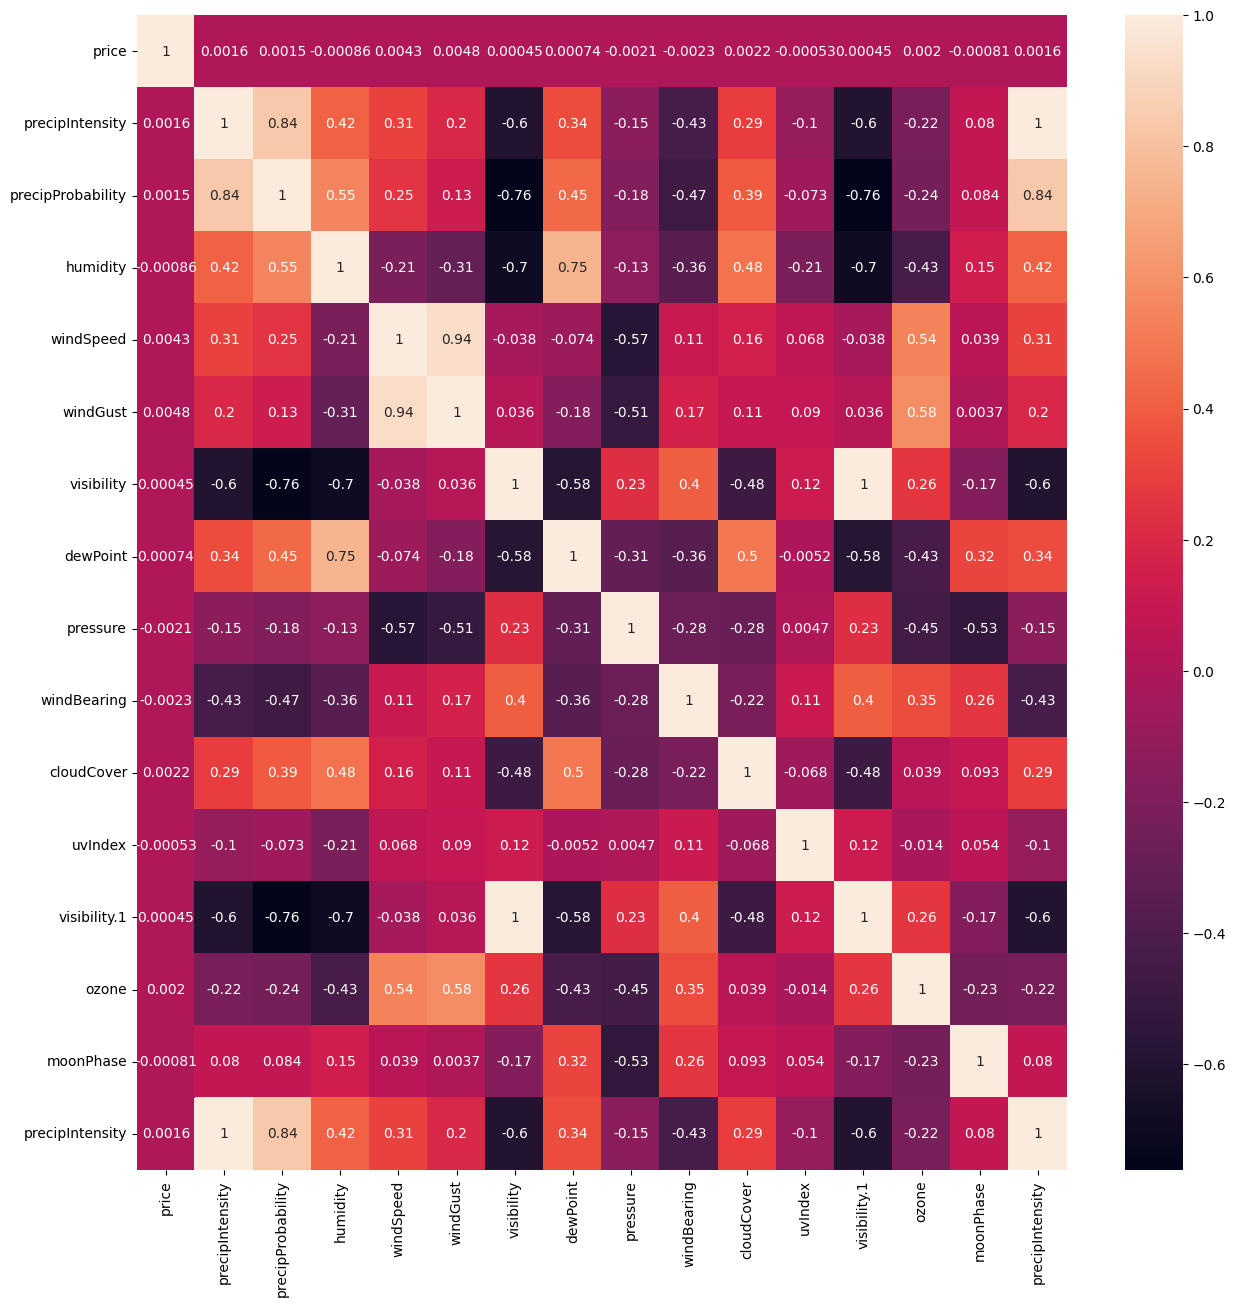

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(climate_fea.corr(),annot=True)

###climate related features have very less correlation with price since dropping it.

In [24]:
df.drop(climate_fea.columns[1:],axis=1,inplace=True)

In [25]:
#extracting numerical and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [26]:
num_df = df[num_col]
cat_df = df[cat_col]

C:\Users\pc\AppData\Local\Temp\ipykernel_10600\2243772707.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_col[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_10600\2243772707.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_col[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel

C:\Users\pc\AppData\Local\Temp\ipykernel_10600\2243772707.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_col[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_10600\2243772707.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[num_col[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel

ValueError: num must be 1 <= num <= 20, not 21

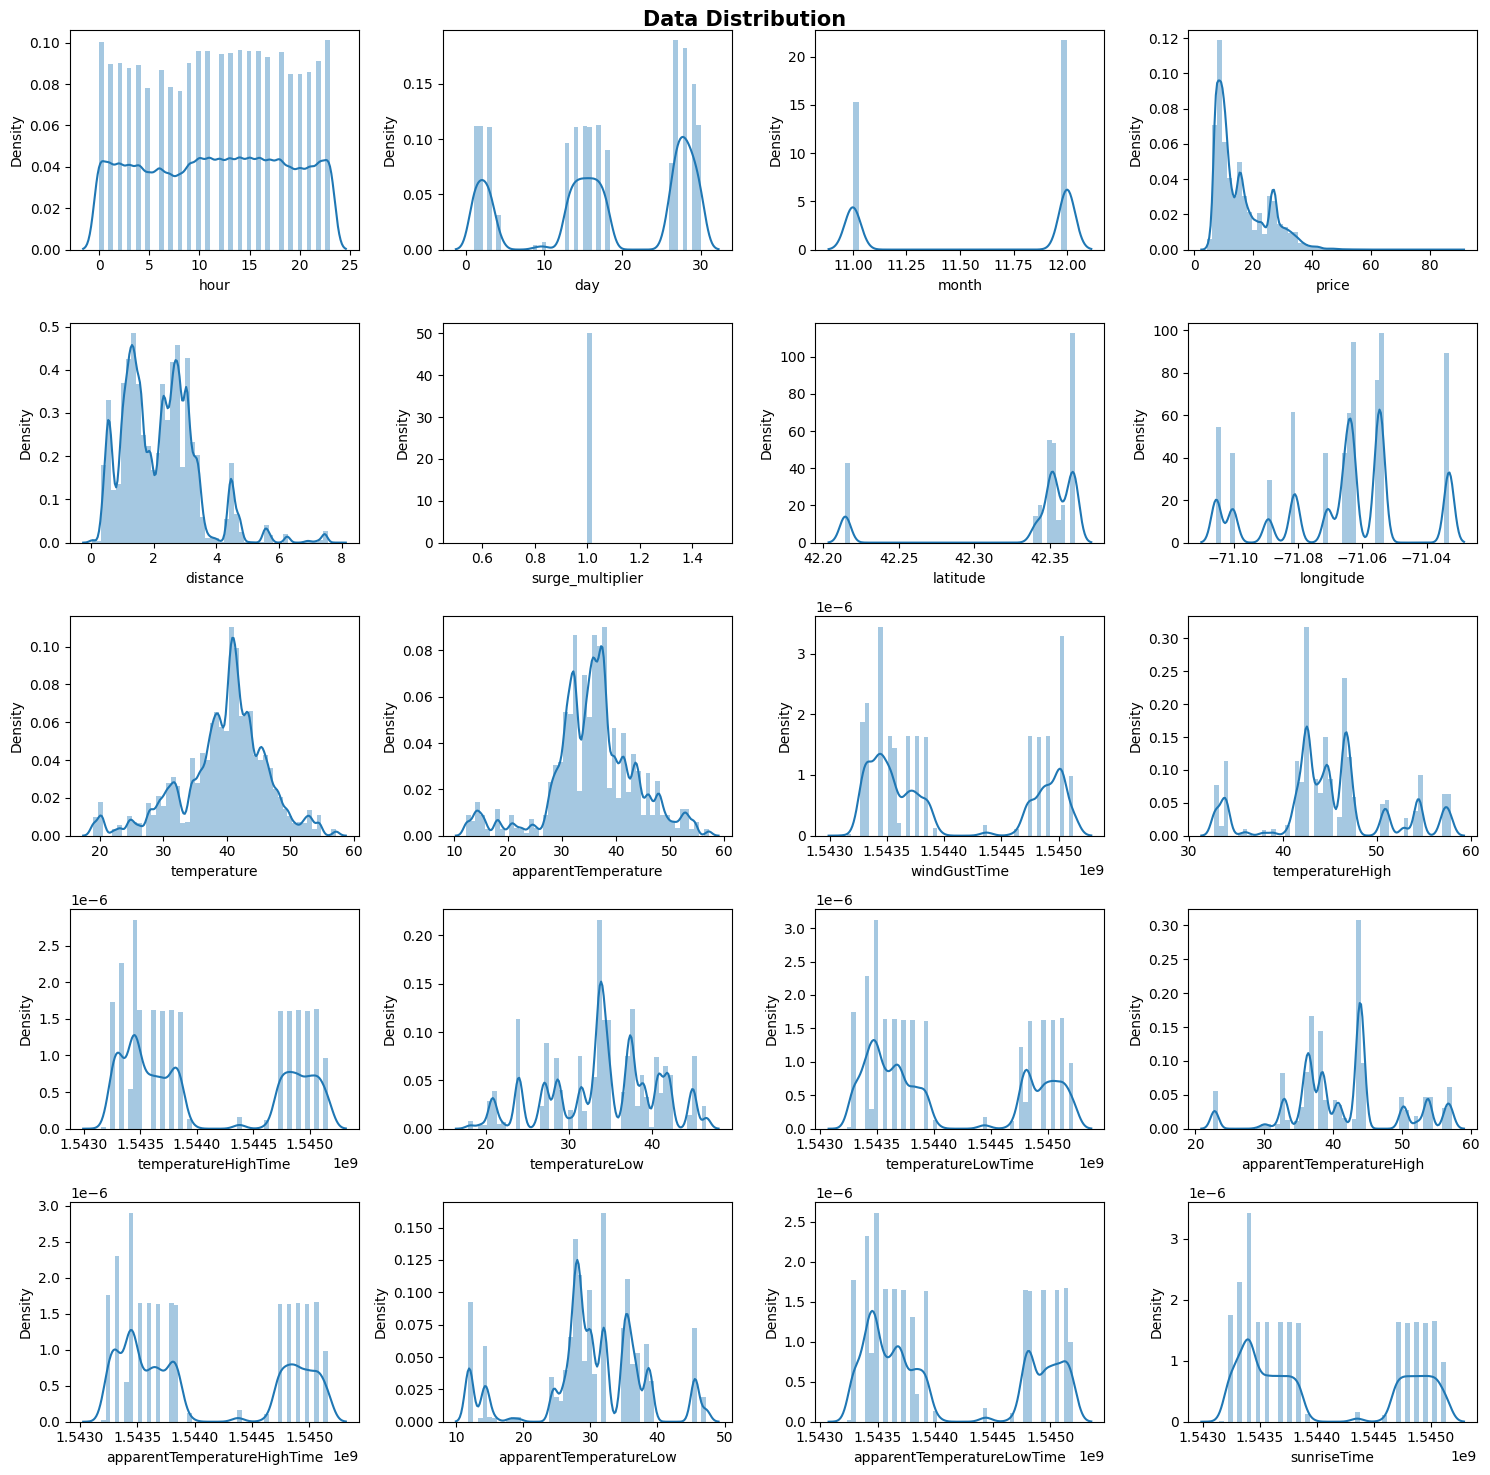

In [29]:
plt.figure(figsize=(15,15))
plt.suptitle('Data Distribution', fontsize=15, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.distplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [ ]:
####All numerical features does not followe normal distribution

In [27]:
### Checking for high booking area
df['source'].value_counts()


Financial District         32620
Theatre District           32283
Boston University          32144
North End                  32143
Northeastern University    32142
Fenway                     32137
Back Bay                   32137
South Station              32130
Haymarket Square           32122
West End                   32074
Beacon Hill                31939
North Station              31792
Name: source, dtype: int64

### Financial District is having high  booking

In [31]:
#### Uber is havingh high booking

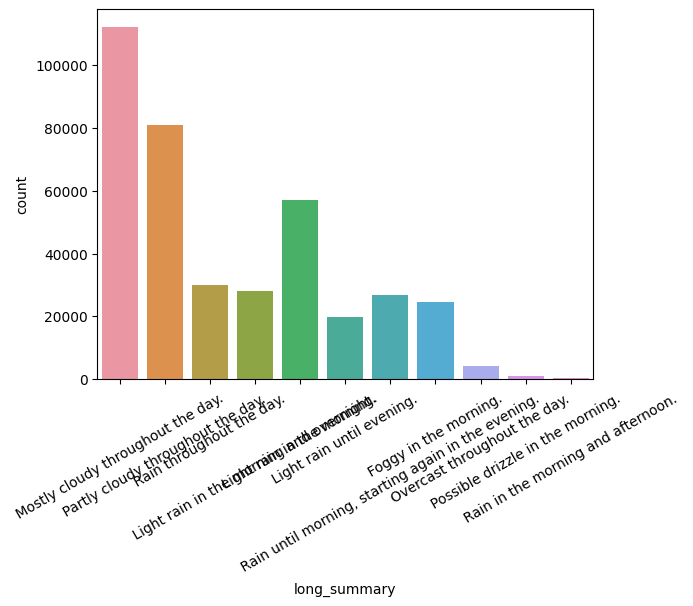

In [32]:
sns.countplot(x=df['long_summary'],data=cat_df)
plt.xticks(rotation=30)
plt.show()

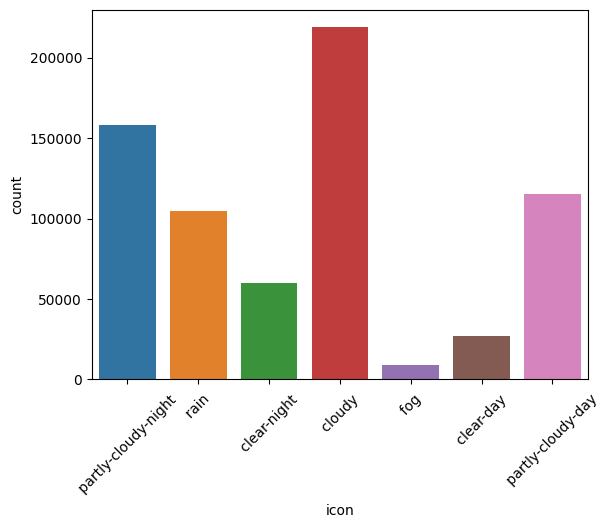

In [49]:
sns.countplot(x=df['icon'],data=cat_df)
plt.xticks(rotation=45)
plt.show()

ValueError: num must be 1 <= num <= 20, not 21

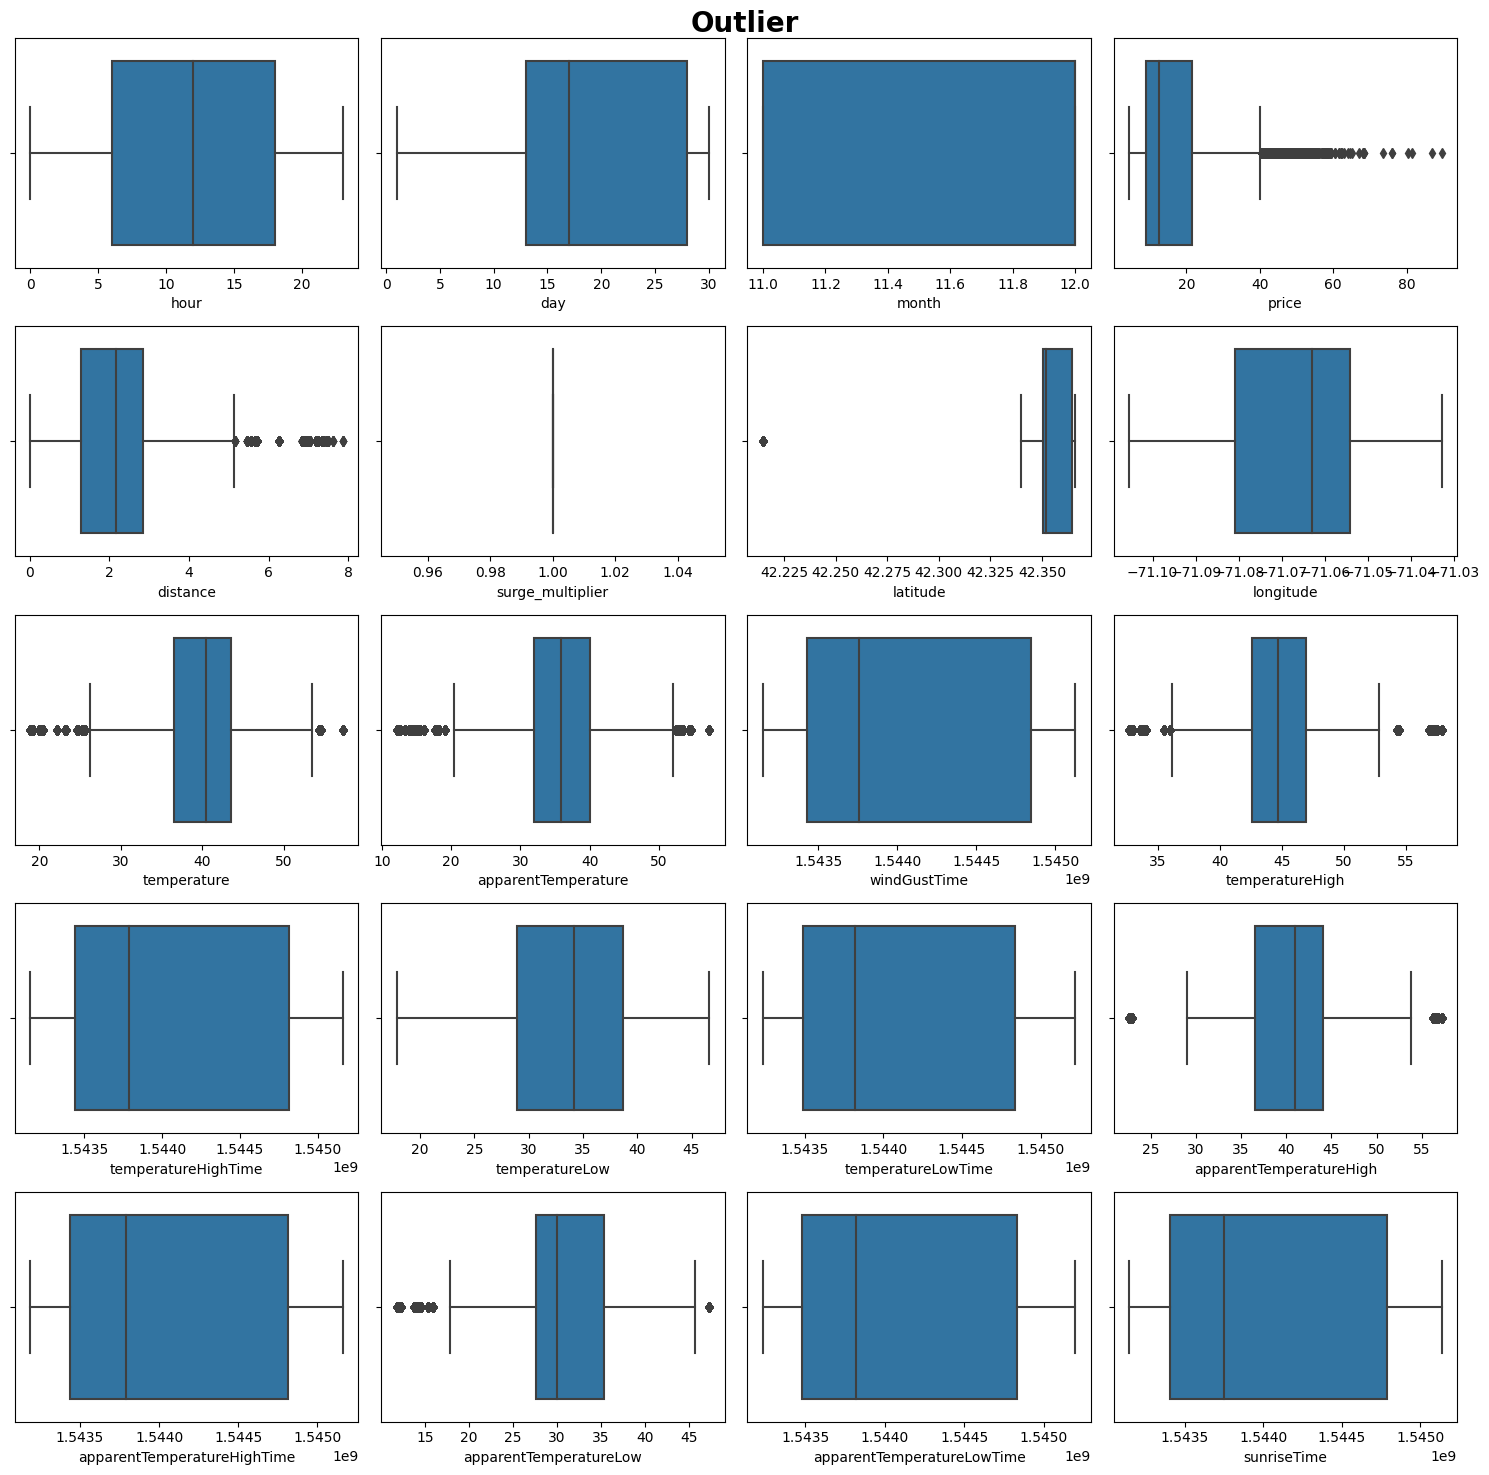

In [33]:
plt.figure(figsize=(15,15))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

###price,distance,surge_multiplier,latitude have outliers

In [ ]:
# Re indexing
df = df.reset_index(drop=True)

In [35]:
def remove_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("###########################")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [36]:
for columns in num_df:
    remove_outliers(df,columns)

hour --- IQR ---> 12.0
Lower Fence: -12.0
Higher Fence: 36.0
###########################
day --- IQR ---> 15.0
Lower Fence: -9.5
Higher Fence: 50.5
###########################
month --- IQR ---> 1.0
Lower Fence: 9.5
Higher Fence: 13.5
###########################
price --- IQR ---> 12.5
Lower Fence: -9.75
Higher Fence: 40.25
###########################
distance --- IQR ---> 1.5399999999999998
Lower Fence: -1.0099999999999996
Higher Fence: 5.1499999999999995
###########################
surge_multiplier --- IQR ---> 0.0
Lower Fence: 1.0
Higher Fence: 1.0
###########################
latitude --- IQR ---> 0.014400000000001967
Lower Fence: 42.3287
Higher Fence: 42.386300000000006
###########################
longitude --- IQR ---> 0.026800000000008595
Lower Fence: -71.12120000000002
Higher Fence: -71.01399999999998
###########################
temperature --- IQR ---> 7.079999999999998
Lower Fence: 25.880000000000003
Higher Fence: 54.199999999999996
###########################
apparentTemperat

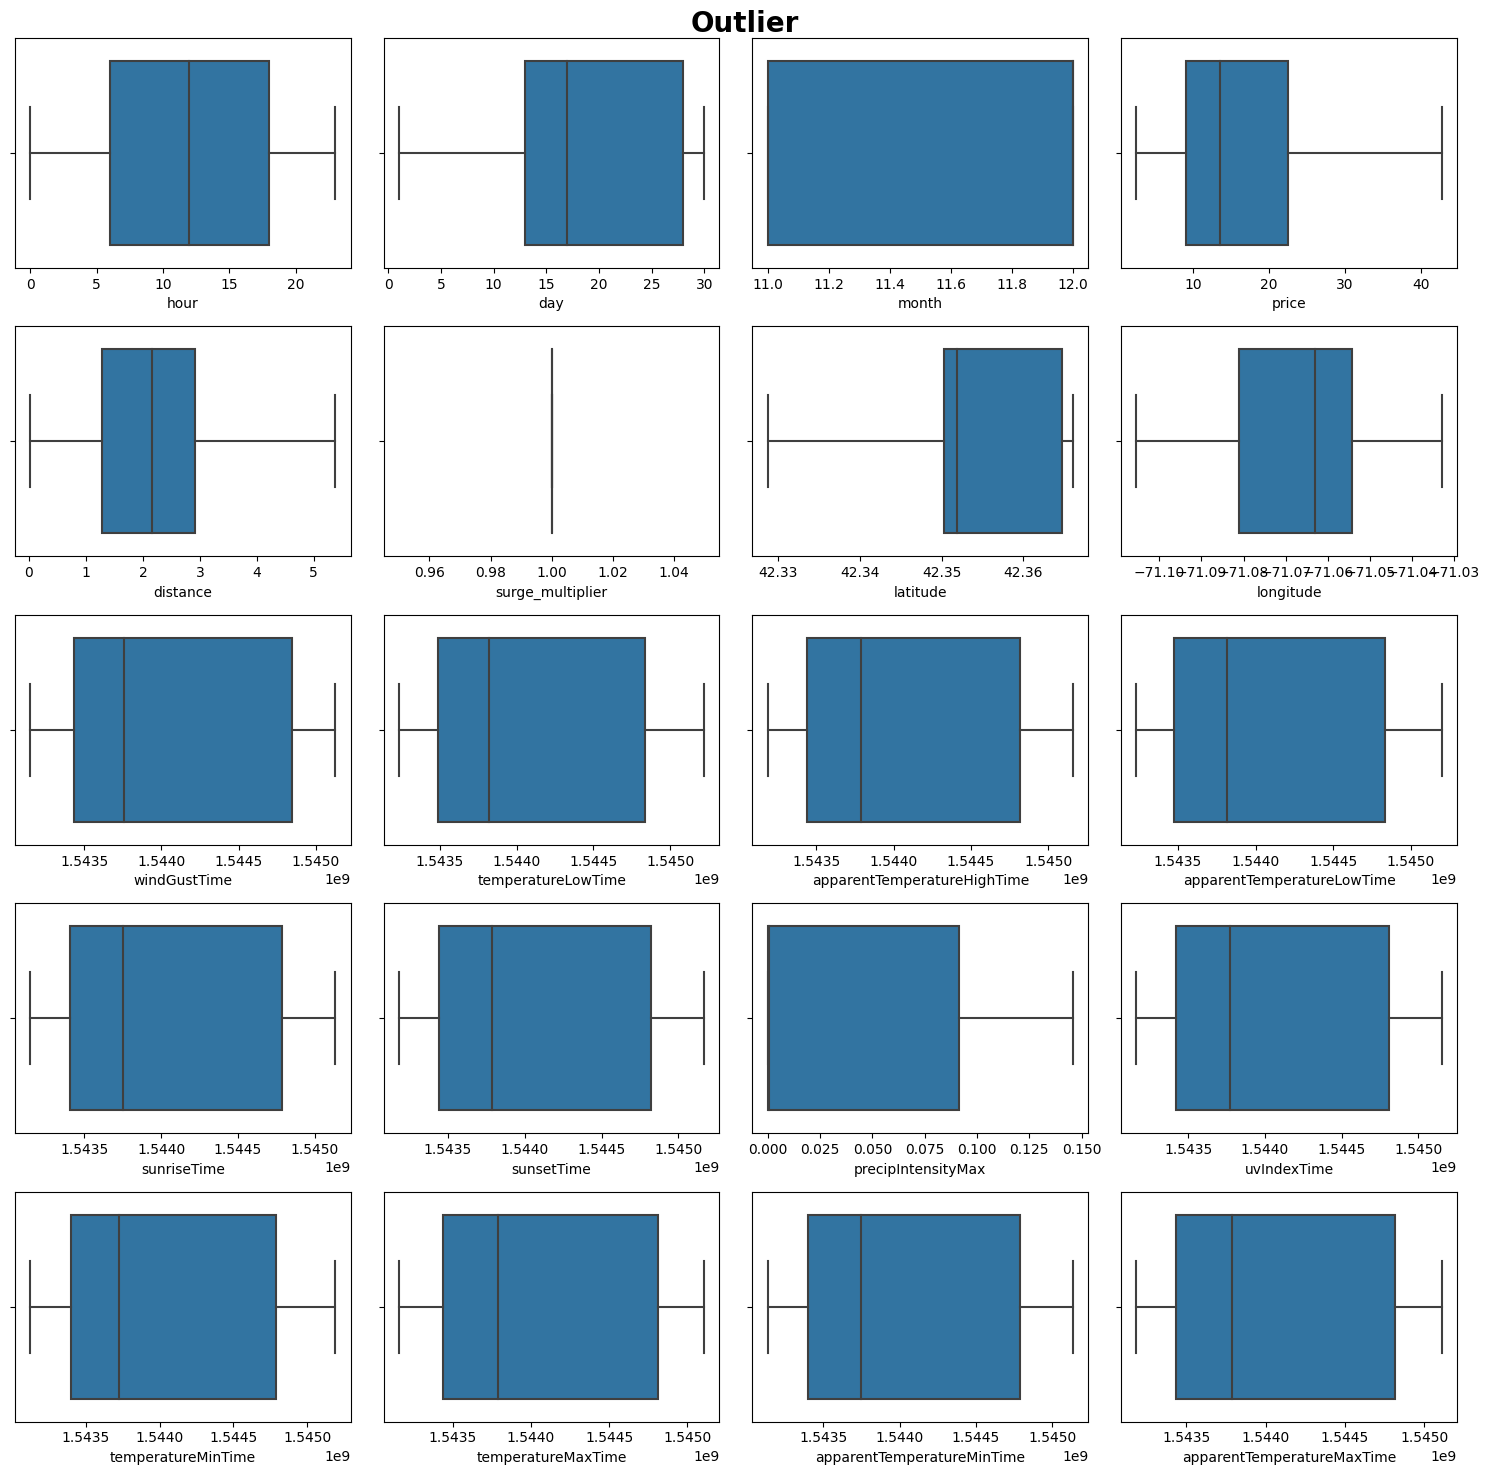

In [26]:
plt.figure(figsize=(15,15))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [28]:
#Filling Missing values
df['price'].fillna(df["price"].mean(), inplace = True)

In [29]:
#### Price Prediction

# Split the data into training and testing sets
X = df.drop(['price'], axis=1)
y = df['price']

In [30]:
# Splitting of the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 1)

In [31]:
num_col

['hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'windGustTime',
 'temperatureLowTime',
 'apparentTemperatureHighTime',
 'apparentTemperatureLowTime',
 'sunriseTime',
 'sunsetTime',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMinTime',
 'temperatureMaxTime',
 'apparentTemperatureMinTime',
 'apparentTemperatureMaxTime']

In [32]:
cat_col

['time',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

In [33]:
# Creating new variables for numerical attributes/columns
numeric_features = ['hour','day','month','distance','surge_multiplier','latitude','longitude','windGustTime','temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['timezone','source','destination','cab_type','product_id','name','short_summary','long_summary','icon']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(transformers=[
                                                ('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features),
                                            ])

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
#Model Training using Gardient Boosting
gb = Pipeline(steps=[('prepocessor', preprocessor), ('Gradient Boosting Regressor', GradientBoostingRegressor())])
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)

#Model evaluation
#Model evaluation
# accuracy scores
accuracy = round(metrics.r2_score(y_test, y_pred),5)
print("****************GardientBoost Regressor ************************************")      
print("Accuracy:", accuracy)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


****************GardientBoost Regressor ************************************
Accuracy: 0.94676
MSE: 3.3619176531187107


In [37]:
y_pred[0:5]

array([31.76330952, 11.19303457, 21.83960445, 10.37780858, 33.78501356])

#### High Booking Prediction

In [103]:
from sklearn.cluster import KMeans

In [104]:
# Select relevant features for clustering
fea_area = [ 'source', 'destination','latitude', 'longitude']

In [105]:
df2= df[fea_area]

In [106]:
df2.shape

(385663, 4)

In [107]:
df2.head(2)

source destination  latitude  longitude
12  North End    West End   42.3647   -71.0542
13  North End    West End   42.3647   -71.0542

In [108]:
#encoding categorical variable
ohe = OneHotEncoder(sparse=False)
# Fit and transform the data
one_hot_encoded = ohe.fit_transform(df2[['source', 'destination']])
# Create a new DataFrame with the one-hot encoded columns
columns = ohe.get_feature_names_out(['source', 'destination'])
df_enc = pd.DataFrame(one_hot_encoded, columns=columns)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [109]:
ohe.get_feature_names_out ()

array(['source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End',
       'destination_Back Bay', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End'],
      dtype=object)

In [111]:
df2.head(2)

source destination  latitude  longitude
12  North End    West End   42.3647   -71.0542
13  North End    West End   42.3647   -71.0542

In [115]:
# Concatenate the original DataFrame with the one-hot encoded columns
df_encoded= pd.concat([df2[['latitude', 'longitude']],df_enc], axis=1)

In [116]:
df_enc.head(12)

source_Back Bay  source_Beacon Hill  source_Boston University  \
0               0.0                 0.0                       0.0   
1               0.0                 0.0                       0.0   
2               0.0                 0.0                       0.0   
3               0.0                 0.0                       0.0   
4               0.0                 0.0                       0.0   
5               0.0                 0.0                       0.0   
6               0.0                 0.0                       0.0   
7               0.0                 1.0                       0.0   
8               0.0                 1.0                       0.0   
9               0.0                 1.0                       0.0   
10              0.0                 1.0                       0.0   
11              0.0                 1.0                       0.0   

    source_Fenway  source_Financial District  source_Haymarket Square  \
0             0.0                        0.0                      0.0   
1             0.0                        0.0                      0.0   
2             0.0                        0.0                      0.0   
3             0.0                        0.0                      0.0   
4             0.0                        0.0                      0.0   
5             0.0                        0.0                      0.0   
6             0.0                        0.0                      0.0   
7             0.0                        0.0                      0.0   
8             0.0                        0.0                      0.0   
9             0.0                        0.0                      0.0   
10            0.0                        0.0                      0.0   
11            0.0                        0.0                      0.0   

    source_North End  source_North Station  source_Northeastern University  \
0                1.0                   0.0                             0.0   
1                1.0                   0.0                             0.0   
2                1.0                   0.0                             0.0   
3                1.0                   0.0                             0.0   
4                1.0                   0.0                             0.0   
5                1.0                   0.0                             0.0   
6                1.0                   0.0                             0.0   
7                0.0                   0.0                             0.0   
8                0.0                   0.0                             0.0   
9                0.0                   0.0                             0.0   
10               0.0                   0.0                             0.0   
11               0.0                   0.0                             0.0   

    source_South Station  ...  destination_Boston University  \
0                    0.0  ...                            0.0   
1                    0.0  ...                            0.0   
2                    0.0  ...                            0.0   
3                    0.0  ...                            0.0   
4                    0.0  ...                            0.0   
5                    0.0  ...                            0.0   
6                    0.0  ...                            0.0   
7                    0.0  ...                            0.0   
8                    0.0  ...                            0.0   
9                    0.0  ...                            0.0   
10                   0.0  ...                            0.0   
11                   0.0  ...                            0.0   

    destination_Fenway  destination_Financial District  \
0                  0.0                             0.0   
1                  0.0                             0.0   
2                  0.0                             0.0   
3                  0.0                             0.0   
4                 

In [117]:
df_encoded.head(12)


latitude  longitude  source_Back Bay  source_Beacon Hill  \
12   42.3647   -71.0542              0.0                 1.0   
13   42.3647   -71.0542              0.0                 1.0   
14   42.3647   -71.0542              0.0                 0.0   
15   42.3647   -71.0542              0.0                 0.0   
16   42.3647   -71.0542              0.0                 0.0   
17   42.3647   -71.0542              0.0                 0.0   
18   42.3647   -71.0542              0.0                 0.0   
25   42.3588   -71.0707              0.0                 0.0   
26   42.3588   -71.0707              0.0                 0.0   
27   42.3588   -71.0707              0.0                 0.0   
28   42.3647   -71.0542              0.0                 0.0   
29   42.3588   -71.0707              0.0                 0.0   

    source_Boston University  source_Fenway  source_Financial District  \
12                       0.0            0.0                        0.0   
13                       0.0            0.0                        0.0   
14                       0.0            0.0                        0.0   
15                       0.0            0.0                        0.0   
16                       0.0            0.0                        0.0   
17                       0.0            0.0                        0.0   
18                       0.0            0.0                        0.0   
25                       0.0            0.0                        0.0   
26                       0.0            0.0                        0.0   
27                       0.0            0.0                        0.0   
28                       0.0            0.0                        0.0   
29                       0.0            0.0                        0.0   

    source_Haymarket Square  source_North End  source_North Station  ...  \
12                      0.0               0.0                   0.0  ...   
13                      0.0               0.0                   0.0  ...   
14                      0.0               0.0                   1.0  ...   
15                      0.0               0.0                   1.0  ...   
16                      0.0               0.0                   1.0  ...   
17                      0.0               0.0                   1.0  ...   
18                      0.0               0.0                   1.0  ...   
25                      0.0               1.0                   0.0  ...   
26                      0.0               1.0                   0.0  ...   
27                      0.0               1.0                   0.0  ...   
28                      0.0               1.0                   0.0  ...   
29                      0.0               1.0                   0.0  ...   

    destination_Boston University  destination_Fenway  \
12                            0.0                 0.0   
13                            0.0                 0.0   
14                            0.0                 1.0   
15                            0.0                 1.0   
16                            0.0                 1.0   
17                            0.0                 1.0   
18                            0.0                 1.0   
25                            0.0                 0.0   
26                            0.0                 0.0   
27                            0.0                 0.0   
28                            0.0                 0.0   
29                            0.0                 0.0   

    destination_Financial District  destination_Haymarket Square  \
12                             0.0                           0.0   
13                             0.0                           0.0   
14                             0.0                           0.0   
15                             0.0                           0.0   
16                             0.0                           0.0   
17                             0.0                           0.0   
1

latitude                               172174
longitude                              172174
source_Back Bay                        172174
source_Beacon Hill                     172174
source_Boston University               172174
source_Fenway                          172174
source_Financial District              172174
source_Haymarket Square                172174
source_North End                       172174
source_North Station                   172174
source_Northeastern University         172174
source_South Station                   172174
source_Theatre District                172174
source_West End                        172174
destination_Back Bay                   172174
destination_Beacon Hill                172174
destination_Boston University          172174
destination_Fenway                     172174
destination_Financial District         172174
destination_Haymarket Square           172174
destination_North End                  172174
destination_North Station         

In [121]:
#checking NAN  values
df_encoded.isnull().values.any()

True

In [124]:
##dropping NAN values
df_encoded=df_encoded.dropna(how='any')

In [126]:
df_encoded

latitude  longitude  source_Back Bay  source_Beacon Hill  \
12       42.3647   -71.0542              0.0                 1.0   
13       42.3647   -71.0542              0.0                 1.0   
14       42.3647   -71.0542              0.0                 0.0   
15       42.3647   -71.0542              0.0                 0.0   
16       42.3647   -71.0542              0.0                 0.0   
...          ...        ...              ...                 ...   
385658   42.3519   -71.0551              0.0                 0.0   
385659   42.3519   -71.0551              0.0                 0.0   
385660   42.3519   -71.0551              0.0                 0.0   
385661   42.3398   -71.0892              0.0                 0.0   
385662   42.3398   -71.0892              0.0                 0.0   

        source_Boston University  source_Fenway  source_Financial District  \
12                           0.0            0.0                        0.0   
13                           0.0            0.0                        0.0   
14                           0.0            0.0                        0.0   
15                           0.0            0.0                        0.0   
16                           0.0            0.0                        0.0   
...                          ...            ...                        ...   
385658                       0.0            0.0                        0.0   
385659                       0.0            0.0                        0.0   
385660                       0.0            0.0                        0.0   
385661                       0.0            0.0                        0.0   
385662                       0.0            0.0                        0.0   

        source_Haymarket Square  source_North End  source_North Station  ...  \
12                          0.0               0.0                   0.0  ...   
13                          0.0               0.0                   0.0  ...   
14                          0.0               0.0                   1.0  ...   
15                          0.0               0.0                   1.0  ...   
16                          0.0               0.0                   1.0  ...   
...                         ...               ...                   ...  ...   
385658                      0.0               0.0                   0.0  ...   
385659                      0.0               0.0                   0.0  ...   
385660                      0.0               0.0                   0.0  ...   
385661                      0.0               0.0                   0.0  ...   
385662                      0.0               0.0                   0.0  ...   

        destination_Boston University  destination_Fenway  \
12                                0.0                 0.0   
13                                0.0                 0.0   
14                                0.0                 1.0   
15                                0.0                 1.0   
16                                0.0                 1.0   
...                               ...                 ...   
385658                            0.0                 0.0   
385659                            0.0                 0.0   
385660                            0.0                 0.0   
385661                            0.0                 0.0   
385662                            0.0                 0.0   

        destination_Financial District  destination_Haymarket Square  \
12                                 0.0                           0.0   
13                                 0.0                           0.0   
14                                 0.0                           0.0   
15                                 0.0                           0.0   
16                                 0.0                           0.0   
...                                ...                           ...   
385658                             0.0                  

In [127]:
# Perform K-means clustering
k = 3  # Number of clusters

kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(df_encoded)

C:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [128]:
# Get the cluster labels

cluster_labels = kmeans.labels_
cluster_labels

array([2, 2, 0, ..., 2, 2, 2])

In [129]:
kmeans.cluster_centers_

array([[ 4.23383290e+01, -7.10664001e+01,  8.83704171e-02,
         8.52475753e-02, -1.21291865e-14, -9.78384040e-15,
         9.02321112e-02, -9.92261828e-15, -4.30211422e-16,
         9.62075489e-02,  9.88098492e-15,  9.46465128e-15,
         5.46947722e-01,  9.29946251e-02, -7.34134975e-15,
        -9.53404022e-15,  9.56670570e-02,  5.42803952e-01,
         3.99680289e-15,  9.19436687e-02,  8.53977119e-02,
         1.22679644e-14,  8.82803351e-02,  9.59072756e-02,
        -5.14865928e-15,  1.44745327e-14],
       [ 4.23383570e+01, -7.10660971e+01, -6.46704912e-15,
        -1.70974346e-14,  1.63757681e-01,  1.66971388e-01,
        -3.86496390e-14,  1.67112753e-01,  1.66339956e-01,
         2.22044605e-15,  1.68337920e-01,  1.67480303e-01,
         3.99957845e-14,  6.52256027e-15,  1.66132620e-01,
         1.63343009e-01,  2.97956104e-14, -1.88876692e-14,
         1.66999661e-01, -4.79061235e-14, -2.42444953e-14,
         1.65934708e-01, -5.46784840e-14, -4.83085794e-14,
         1.69

In [131]:
# Add cluster labels to the DataFrame
df_encoded['cluster'] = cluster_labels

C:\Users\pc\AppData\Local\Temp\ipykernel_12368\597764646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['cluster'] = cluster_labels


In [133]:
df_encoded

latitude  longitude  source_Back Bay  source_Beacon Hill  \
12       42.3647   -71.0542              0.0                 1.0   
13       42.3647   -71.0542              0.0                 1.0   
14       42.3647   -71.0542              0.0                 0.0   
15       42.3647   -71.0542              0.0                 0.0   
16       42.3647   -71.0542              0.0                 0.0   
...          ...        ...              ...                 ...   
385658   42.3519   -71.0551              0.0                 0.0   
385659   42.3519   -71.0551              0.0                 0.0   
385660   42.3519   -71.0551              0.0                 0.0   
385661   42.3398   -71.0892              0.0                 0.0   
385662   42.3398   -71.0892              0.0                 0.0   

        source_Boston University  source_Fenway  source_Financial District  \
12                           0.0            0.0                        0.0   
13                           0.0            0.0                        0.0   
14                           0.0            0.0                        0.0   
15                           0.0            0.0                        0.0   
16                           0.0            0.0                        0.0   
...                          ...            ...                        ...   
385658                       0.0            0.0                        0.0   
385659                       0.0            0.0                        0.0   
385660                       0.0            0.0                        0.0   
385661                       0.0            0.0                        0.0   
385662                       0.0            0.0                        0.0   

        source_Haymarket Square  source_North End  source_North Station  ...  \
12                          0.0               0.0                   0.0  ...   
13                          0.0               0.0                   0.0  ...   
14                          0.0               0.0                   1.0  ...   
15                          0.0               0.0                   1.0  ...   
16                          0.0               0.0                   1.0  ...   
...                         ...               ...                   ...  ...   
385658                      0.0               0.0                   0.0  ...   
385659                      0.0               0.0                   0.0  ...   
385660                      0.0               0.0                   0.0  ...   
385661                      0.0               0.0                   0.0  ...   
385662                      0.0               0.0                   0.0  ...   

        destination_Fenway  destination_Financial District  \
12                     0.0                             0.0   
13                     0.0                             0.0   
14                     1.0                             0.0   
15                     1.0                             0.0   
16                     1.0                             0.0   
...                    ...                             ...   
385658                 0.0                             0.0   
385659                 0.0                             0.0   
385660                 0.0                             0.0   
385661                 0.0                             0.0   
385662                 0.0                             0.0   

        destination_Haymarket Square  destination_North End  \
12                               0.0                    0.0   
13                               0.0                    0.0   
14                               0.0                    0.0   
15                               0.0                    0.0   
16                               0.0                    0.0   
...                              ...                    ...   
385658                           0.0                    1.0   
385659                           0.0        

In [132]:
# Get the high booking area based on the most common cluster
high_booking_area = df_encoded['cluster'].value_counts().idxmax()

print(f"The high booking area is cluster {high_booking_area}")

The high booking area is cluster 1


In [134]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_encoded['cluster'],kmeans.labels_))

[[ 33303      0      0]
 [     0 106108      0]
 [     0      0  74078]]


In [136]:
print(classification_report(df_encoded['cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33303
           1       1.00      1.00      1.00    106108
           2       1.00      1.00      1.00     74078

    accuracy                           1.00    213489
   macro avg       1.00      1.00      1.00    213489
weighted avg       1.00      1.00      1.00    213489



### To use  map function to display the data  first install Folium,then give cordinatesand info as below

In [138]:
pip install folium


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ----------------------------------- --- 92.2/102.3 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 102.3/102.3 kB 1.5 MB/s eta 0:00:00


In [139]:
import folium
from folium import plugins

coord=[]
for lat,lng in zip(df_encoded.latitude.values,df_encoded.longitude.values):
  coord.append([lat,lng])

map = folium.Map(
    
    location=[42.3519,-71.0551],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)

map.add_child(plugins.HeatMap(coord))
        
map